In [24]:
from sqlalchemy import create_engine
import psycopg2 as pg
import pandas as pd 


# get connected to the database

connection = pg.connect("dbname=Pewlett_db password= user=postgres")

 
df = pd.read_sql_query('select * from salaries',con=connection)
# print(df)

salary_df = pd.DataFrame(df)

salary_df.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [25]:
connection = pg.connect("dbname=Pewlett_db password= user=postgres")

df_2 = pd.read_sql_query('select * from titles',con=connection)

title_df = pd.DataFrame(df_2)
title_df.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [26]:
combined_df = salary_df.merge(title_df, how='inner', on='emp_no')

combined_df.head()

,emp_no,salary,from_date_x,to_date_x,title,from_date_y,to_date_y
0,10001,60117,1986-06-26,1987-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,65828,1996-08-03,1997-08-03,Staff,1996-08-03,9999-01-01
2,10003,40006,1995-12-03,1996-12-02,Senior Engineer,1995-12-03,9999-01-01
3,10004,40054,1986-12-01,1987-12-01,Engineer,1986-12-01,1995-12-01
4,10004,40054,1986-12-01,1987-12-01,Senior Engineer,1995-12-01,9999-01-01


In [36]:
avg_salary_title = combined_df.groupby(['title']).mean()['salary']
avg_salary_title 

df_salary_title = pd.DataFrame(avg_salary_title)


df_new = df_salary_title.reset_index()

# df_new 

new_df = df_new.rename(columns={'title':'Title',
                     'salary': 'Salary'})
new_df

,Title,Salary
0,Assistant Engineer,48493.204786
1,Engineer,48539.781423
2,Manager,51531.041667
3,Senior Engineer,48506.751806
4,Senior Staff,58503.286614
5,Staff,58465.271904
6,Technique Leader,48580.505772


AxesSubplot(0.125,0.125;0.775x0.755)


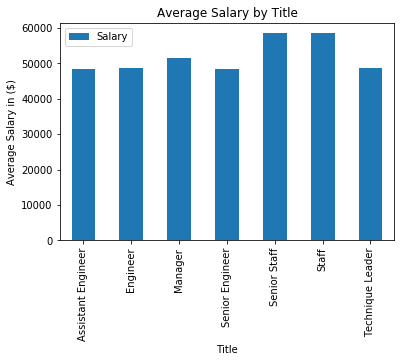

In [45]:
import matplotlib.pyplot as plt 

bar = new_df.plot(x='Title', y='Salary', kind='bar')
plt.ylabel('Average Salary in ($)')
plt.title('Average Salary by Title')
print(bar) 
plt.savefig('averagesalarybytitle.png')
plt.show()